In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

In [3]:
train_dir="./minimal_faces"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 65 images belonging to 13 classes.


In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [44]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,749 (956.05 KB)

 Trainable params: 244,173 (953.80 KB)

 Non-trainable params: 576 (2.25 KB)

In [45]:
history = model.fit(train_ds,epochs= 30, batch_size=32)
model.save("./models/model-30epoch-datasets.h5")

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 445ms/step - accuracy: 0.1240 - loss: 3.1843
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 0.5660 - loss: 1.4362
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.7769 - loss: 1.1528
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.7078 - loss: 1.1294
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.8371 - loss: 0.9837
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.7520 - loss: 0.9653
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.8838 - loss: 0.7190
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.8927 - loss: 0.6785
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.8853 - loss: 0.7496
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 664ms/step - accuracy: 0.9160 - loss: 0.6214
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.8847 - loss: 0.5224
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.9224 - l

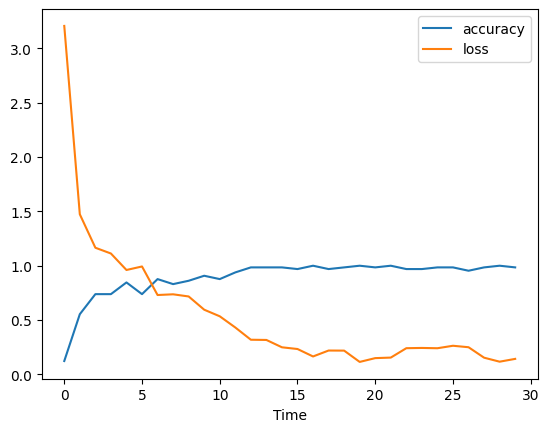

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [47]:
def predict_image(image_path):
    # Load image
    img = image.load_img(image_path, target_size=(224,224,3))
    img_array = image.img_to_array(img)
    
    # Load the image using OpenCV
    img_cv2 = cv2.imread(image_path)
    gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
    
    # Load the pre-trained face detector from OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img_cv2, (x, y), (x+w, y+h), (0, 0, 255), 5)
    
    # Display the image with rectangles around faces
    plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # Predict using the model
    x = np.expand_dims(img_array, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    
    # Show accuracy
    print("Accuracy: " + str(np.max(pred) * 100) + "%")
    print("Actual: " + (image_path.split("/")[-1]).split("_")[0])
    
    if np.max(pred) < 0.90:
        print("Predicted: Unknown")
    else:
        print("Predicted: " + classes[np.argmax(pred)])

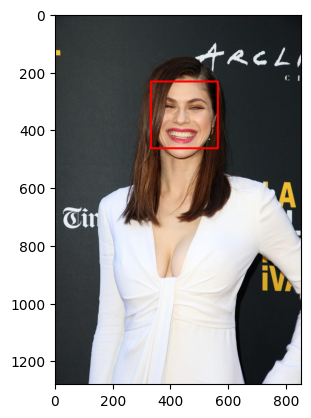

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Accuracy: 95.23887634277344%
Actual: Alexandra Daddario
Predicted: Alexandra Daddario


In [48]:
predict_image("./original_images/Alexandra Daddario/Alexandra Daddario_0.jpg")

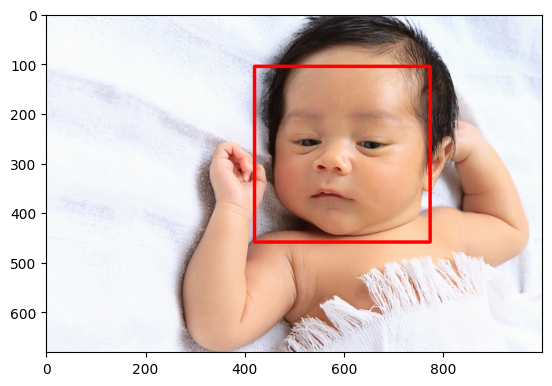

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Accuracy: 41.83198809623718%
Actual: baby.jpg
Predicted: Unknown


In [49]:
predict_image("./tests/baby.jpg")

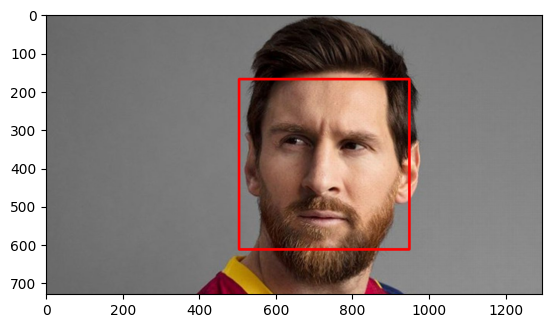

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Accuracy: 41.88381731510162%
Actual: messi-ges.jpg
Predicted: Unknown


In [50]:
predict_image("./tests/messi-ges.jpg")

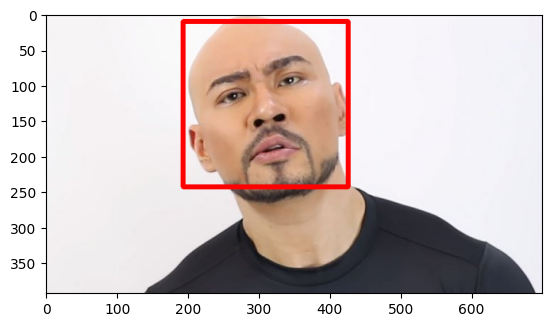

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Accuracy: 22.71389812231064%
Actual: deddy.jpg
Predicted: Unknown


In [51]:
predict_image("./tests/deddy.jpg")

In [5]:
# Load the model
clf = tf.keras.models.load_model('./models/model-30epoch-datasets.h5')

# Make realtiem predictions with webcam and reactangle around the face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (224,224))
        face = np.expand_dims(face, axis=0)
        pred = clf.predict(face)
        if np.max(pred) > 0.90:
            cv2.putText(img, f"{classes[np.argmax(pred)]}, {np.max(pred):.2f}%", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        else:
            cv2.putText(img, f"Unknown, {np.max(pred):.2f}%", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━